Projeto Formação Machine Learning
---
Autor: Graciliano Alves da Costa Filho


---
O que aprendemos: é possível elaborar um modelos de predição da nota total do enem com um bom desepenho, usando apenas o resultados de 3 avaliações da provas. Além disso, é possível utilizar as 3 mesmas variáveis para elaborar modelos de classificação dos top_x primeiros alunos. Esse modelos também tem bom desempenho.
Outra lição aprendida é que as vezes modelos mais simples tem desempenho melhor ou igual aos modelos mais complexos e ainda tem tempo de execução bem menor (menor custo de processamento). Assim, ao analisar um dataset e elaborar predições vale a pena testar diversos modelos para encontrar o que tem melhor custo benefício.


In [1]:
#Importando e verificando as versões das bibliotecas
import pandas as pd
import seaborn as sns
import scipy
import yellowbrick
import numpy as np

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando yellowbrick %s" % yellowbrick.__version__)
print("Usando numpy %s" % np.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Usando pandas 1.0.3
Usando seaborn 0.10.1
Usando scipy 1.4.1
Usando yellowbrick 0.9.1
Usando numpy 1.18.4


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
# Configuração do pandas para usar impressão de ponto flutuante com 3 casas decimais
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Pergunta: carregue os dados

In [3]:
#SOLUçÃO1: carregando os dados (usando o chunksize, pois o arquivo é muito grande)
chunks = pd.read_csv('/content/drive/My Drive/MICRODADOS_ENEM_2017.csv', sep=';', encoding='iso-8859-1',
                   usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT",
                            "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", 
                            "NU_NOTA_COMP4", "NU_NOTA_COMP5"], chunksize=100000)
dfList = []
for df in chunks:
    dfList.append(df)

enem = pd.concat(dfList,sort=False)
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


In [4]:
#Verificando o formato do dataset
print("%d elementos e %d colunas" % (enem.shape[0], enem.shape[1]))
if(enem.shape[0] != 6731341):
    print("ERRO! No conjunto de 2017 existem 6731341 dados")
if(enem.shape[1] != 9):
    print("ERRO! Carregue somente 9 colunas relativas as notas")

6731341 elementos e 9 colunas


Pergunta: abra o arquivo

In [5]:
#SOLUçÃO2: lista de notas
todas_as_notas = enem.columns
enem[todas_as_notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000



Pergunta: alguns alunos e alunas não vieram na prova e possuem valores vazios

In [6]:
#SOLUçÃO3: removendo linhas inválidas
enem = enem.dropna()
enem['NU_NOTA_MT'].head()

0   465.500
3   591.200
4   584.600
5   578.500
6   607.500
Name: NU_NOTA_MT, dtype: float64

Pergunta: analise a nota total

In [7]:
#SOLUçÃO4: criando coluna nota total
enem['nota_total'] = enem.sum(axis=1)
enem['nota_total'].head()

0   2681.400
3   2949.500
4   2786.700
5   2795.000
6   2858.500
Name: nota_total, dtype: float64

DESCRIçÃO DAS NOTAS TOTAIS
Media: 2592.75
Mediana: 2569.30
Desvio padrão: 395.99


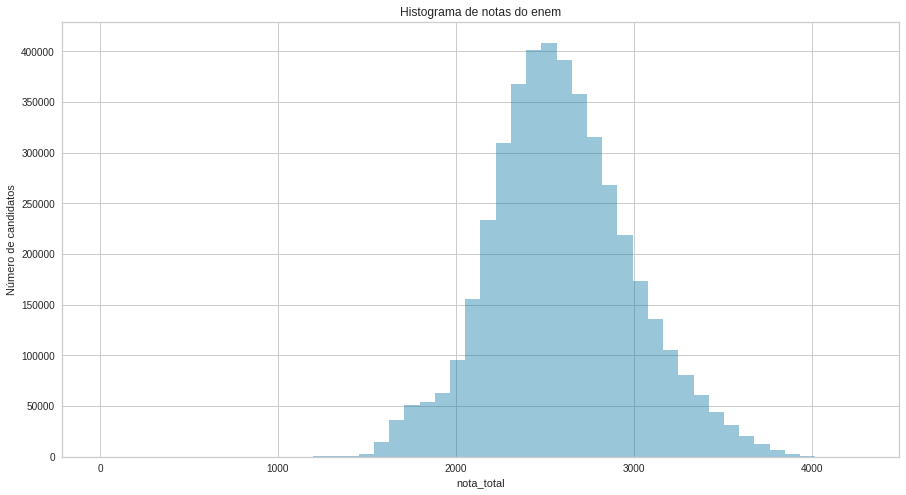

In [8]:
#SOLUçÃO5: descrição e histograma de notas totais do enem
import matplotlib.pyplot as plt

media = enem['nota_total'].mean()
mediana = enem['nota_total'].median()
std = enem['nota_total'].std()

print('DESCRIçÃO DAS NOTAS TOTAIS')
print('Media: %.2f' % media)
print('Mediana: %.2f' % mediana)
print('Desvio padrão: %.2f' % std)

plt.figure(figsize = (15,8))
plt.xlabel('Nota total')
plt.ylabel('Número de candidatos')
plt.title('Histograma de notas do enem')
sns.distplot(enem['nota_total'], kde=False)

Pergunta: extraia 1% dos dados para explorarmos

In [0]:
#SOLUçÃO6: EXTRAI SAMPLE E descrição e histograma de notas do sample
#O GRAFICO E A DESCRICAO ESTATISTICA DO SAMPLE SÃO MUITO PARECIDOS COM O DO DATASET, PODEMOS CONSIDERAR QUE O SAMPLE REPRESENTA BEM O CONJUNTO TOTAL

def eda_sample(enem):
  SEED=745
  np.random.seed(SEED)
  enem_eda = enem.sample(frac=0.01)
  media_eda = enem_eda['nota_total'].mean()
  mediana_eda = enem_eda['nota_total'].median()
  std_eda = enem_eda['nota_total'].std()

  print("Enem EDA sampling tem a distribuição")
  print('Media: %.2f' % media_eda)
  print('Mediana: %.2f' % mediana_eda)
  print('Desvio padrão: %.2f' % std_eda)
  
  plt.figure(figsize = (15,8))
  plt.xlabel('Nota total')
  plt.ylabel('Número de candidatos')
  plt.title('Histograma de notas da amostra')
  sns.distplot(enem_eda['nota_total'], kde=False)
  return enem_eda

Enem EDA sampling tem a distribuição
Media: 2594.19
Mediana: 2572.80
Desvio padrão: 396.48


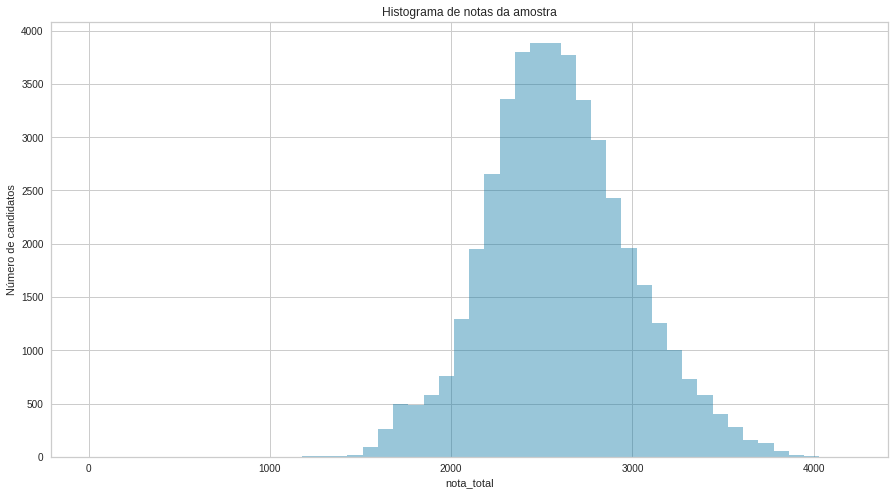

In [10]:
enem_eda=eda_sample(enem)

Pergunta: analise a correlação entre as notas

In [11]:
#solucao7: atualiza todas_as_notas com 'notal_total'
todas_as_notas = enem.columns
todas_as_notas

Index(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'nota_total'],
      dtype='object')

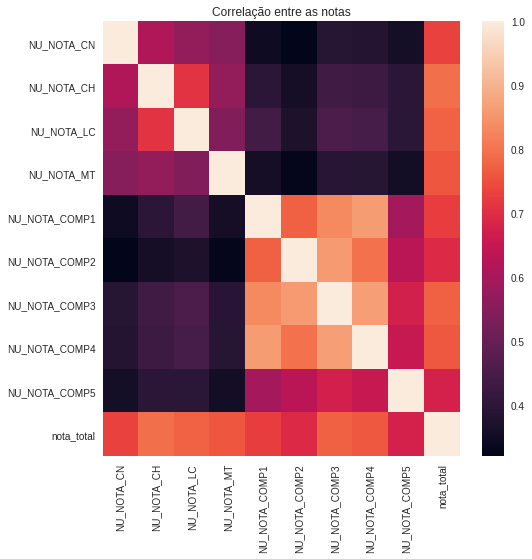

In [12]:
#solucao8: correlação entre todas as variáveis
correlacoes = enem.corr()
if(correlacoes.shape != (10,10)):
    print("A matriz de correlação deveria ser entre 10 notas, totalizando 10 linhas por 10 colunas")
plt.figure(figsize = (8,8))
plt.title('Correlação entre as notas')
sns.heatmap(correlacoes)

In [13]:
#solucao8: correlação entre todas as variáveis
correlacoes
#alta correlação entre as 4 primeiras componentes da redação (>0.75)
#correlação média entre componentes 5 e as demais componentes da redação (>0.59 e >0.7)
#correlação alta entre notas de Ciências Humanas e Linguagens e Códigos (=0.708)
#baixa correlação entre matematica e os outros grupos (<0.57)
#baixissima correlação entre notas de redação e notas dos demais grupos (<0.4)
#correlação média a alta entre os grupos e a nota total (>0.67)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
NU_NOTA_CN,1.000,0.612,0.570,0.549,0.345,0.319,0.390,0.384,0.356,0.733
NU_NOTA_CH,0.612,1.000,0.708,0.570,0.398,0.359,0.436,0.427,0.394,0.794
NU_NOTA_LC,0.570,0.708,1.000,0.542,0.441,0.370,0.455,0.446,0.396,0.776
NU_NOTA_MT,0.549,0.570,0.542,1.000,0.357,0.325,0.394,0.391,0.353,0.760
NU_NOTA_COMP1,0.345,0.398,0.441,0.357,1.000,0.774,0.833,0.862,0.594,0.726
NU_NOTA_COMP2,0.319,0.359,0.370,0.325,0.774,1.000,0.859,0.796,0.631,0.693
NU_NOTA_COMP3,0.390,0.436,0.455,0.394,0.833,0.859,1.000,0.867,0.673,0.773
NU_NOTA_COMP4,0.384,0.427,0.446,0.391,0.862,0.796,0.867,1.000,0.653,0.761
NU_NOTA_COMP5,0.356,0.394,0.396,0.353,0.594,0.631,0.673,0.653,1.000,0.677
nota_total,0.733,0.794,0.776,0.760,0.726,0.693,0.773,0.761,0.677,1.000


Pergunta: analise a correlação da nota_total

NU_NOTA_CN      0.733
NU_NOTA_CH      0.794
NU_NOTA_LC      0.776
NU_NOTA_MT      0.760
NU_NOTA_COMP1   0.726
NU_NOTA_COMP2   0.693
NU_NOTA_COMP3   0.773
NU_NOTA_COMP4   0.761
NU_NOTA_COMP5   0.677
nota_total      1.000
Name: nota_total, dtype: float64


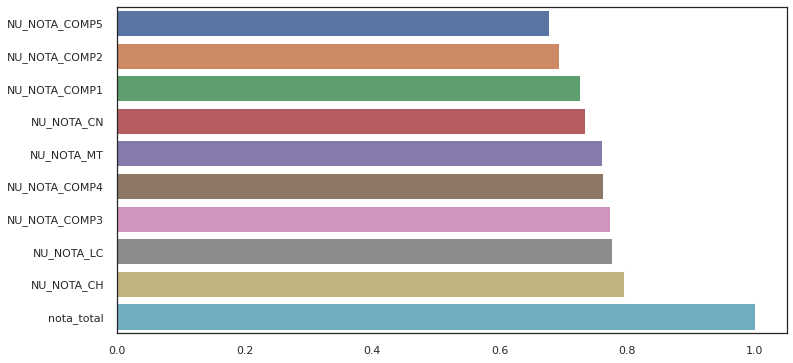

In [14]:
#solucao8: grafico de correlação entre nota_total e as variaveis independentes
correlacao_com_nota_total = correlacoes['nota_total']
print(correlacao_com_nota_total)
def plota_correlacao(dados):
    sns.set(style="white")
    plt.figure(figsize=(12, 6))
    corr = correlacao_com_nota_total.sort_values()
    sns.barplot(y=corr.index, x=corr.values)
    
plota_correlacao(correlacao_com_nota_total)

Pergunta: tente um primeiro modelo

In [15]:
#SOLUçÃO10: definindo variavel interesse
interesse = enem_eda[['NU_NOTA_MT', 'NU_NOTA_LC','nota_total']]
interesse.head()

,NU_NOTA_MT,NU_NOTA_LC,nota_total
3066813,418.700,514.900,2471.600
249978,652.200,466.100,2807.900
2399891,532.700,539.900,2577.300
3959805,578.500,647.300,3198.700
5505273,374.900,419.900,2247.700


In [0]:
# Solução11: a função de split
from sklearn.model_selection import train_test_split

def split(dados):
    SEED = 42367
    np.random.seed(SEED)
    x = dados.iloc[:, :-1]
    y = dados['nota_total']
    train_x, test_x, train_y, test_y = train_test_split(x, y, shuffle=True)
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Desvio padrão do conjunto de testes", test_y.std())
    return train_x, test_x, train_y, test_y

In [17]:
train_x, test_x, train_y, test_y = split(interesse)
if(train_x.shape[1]!=2):
    print("*" * 80)
    print("Erro! Você deveria possuir somente duas colunas em X")
    print("*" * 80)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 2) (33201,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 396.6774613706172


Pergunta: execute uma regressão linear

In [0]:
#Solução12: regressão linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def roda_regressao_linear(train_x, test_x, train_y, test_y):    
  model = LinearRegression()
  model.fit(train_x, train_y)
  r2_score = model.score(test_x, test_y)
  test_pred = model.predict(test_x)
  mse = mean_squared_error(test_y, test_pred)
  mae = mean_absolute_error(test_y, test_pred) 
    
  print("*" * 80)
  print("r2 score", r2_score)
  print("mse", mse)
  print("mae", mae)
  
  return model

In [19]:
roda_regressao_linear(train_x, test_x, train_y, test_y)

********************************************************************************
r2 score 0.7692311471988329
mse 36308.89210227679
mae 142.102755998379


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Pergunta: analise o erro médio absoluto

---
O mae é bem menor que o std (<0.5std).
O std é uma métrica de dispersão das notas ao redor da média da amostra.
O mae é uma métrica que mostra o erro médio das previsões do modelo.
Não entendi se faz sentido comparar os dois.
De toda forma, o mae é pequeno se comparado com o std e com a nota total média dos alunos.
Considerando que com apenas 2 das 9 variaveis é possível construir um modelo com um R²>0.75. Eu consideraria o modelo razoável. Mas ainda é necessário comparar com outros modelos ou um baseline.

Analisando o erro

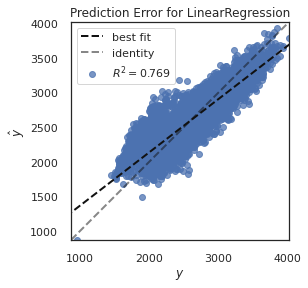

In [20]:
#Solução 13: yellowbrick
from yellowbrick.regressor import PredictionError

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

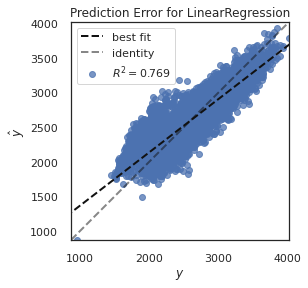

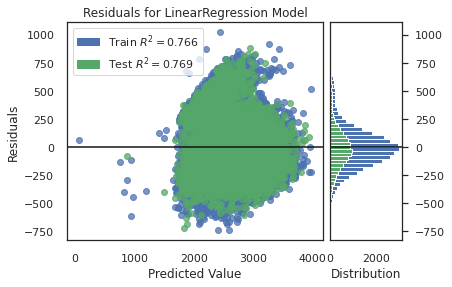

In [21]:
#yellowbrick parte 2
from yellowbrick.regressor import ResidualsPlot

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()
    
    visualizer = ResidualsPlot(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

Explorando combinações de features¶

In [0]:
#Solução14:
def regressao_completa_para(notas):
    interesse = enem_eda[notas]
    train_x, test_x, train_y, test_y = split(interesse)
    model = roda_regressao_linear(train_x, test_x, train_y, test_y)
    visualiza_erros(train_x,train_y,test_x,test_y)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 9) (33201,) (11067, 9) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 1.0
mse 1.924445000606224e-25
mae 3.445429237537726e-13


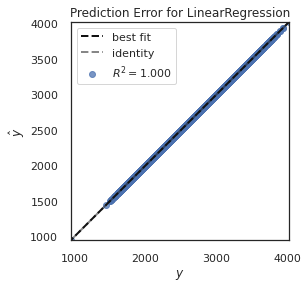

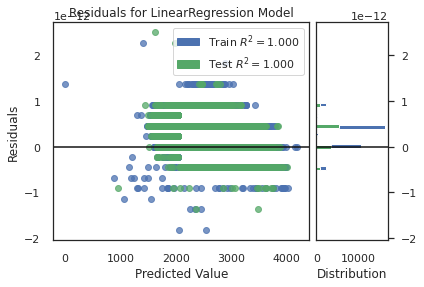

In [23]:
#Solução 14.1
#MODELO com 9 variáveis: nesse caso a previsão é ótima, pois usa todas as variaveis que compoem a variável nota_total
#Porém, não é viável utilizar esse modelo, pois queremos prever a nota_total sem ter todas as notas.
notas = ['NU_NOTA_CN',	'NU_NOTA_CH',	'NU_NOTA_LC',	'NU_NOTA_MT',	'NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','nota_total']
regressao_completa_para(notas)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 8) (33201,) (11067, 8) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.9929379014409435
mse 1111.1420431480792
mae 26.289560074407653


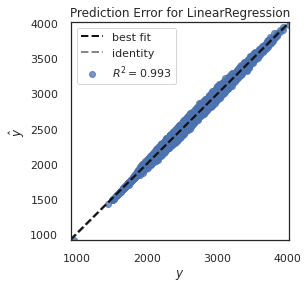

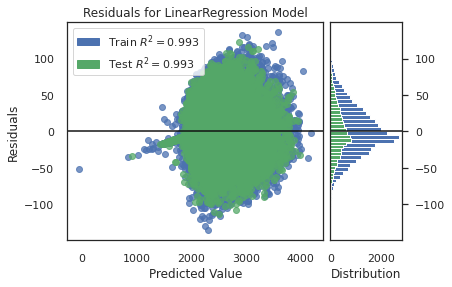

In [24]:
#Solução 14.2
#MODELO com 8 variáveis (excluíndo a NU_NOTA_COMP5, que tem a menor correlação com a nota_total)
#modelo limitado, pois considera 8 variáveis
notas = ['NU_NOTA_CN',	'NU_NOTA_CH',	'NU_NOTA_LC',	'NU_NOTA_MT',	'NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','nota_total']
regressao_completa_para(notas)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 4) (33201,) (11067, 4) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.8475200762655194
mse 23991.00672138306
mae 109.06531946670808


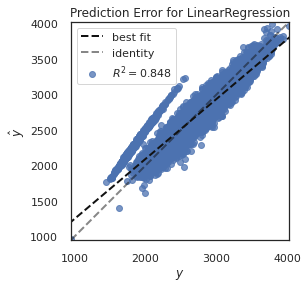

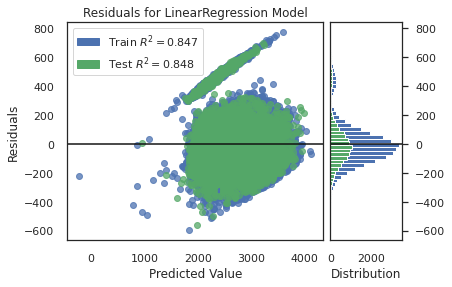

In [25]:
#Solução 14.3
#MODELO com as primeiras variaveis 4 variáveis (excluíndo a redação)
#um pouco melhor que o teste com 2 variáveis
notas = ['NU_NOTA_CN',	'NU_NOTA_CH',	'NU_NOTA_LC',	'NU_NOTA_MT',	'nota_total']
regressao_completa_para(notas)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 4) (33201,) (11067, 4) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_COMP2' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.8987881176038027
mse 15924.555124248855
mae 99.7853976679927


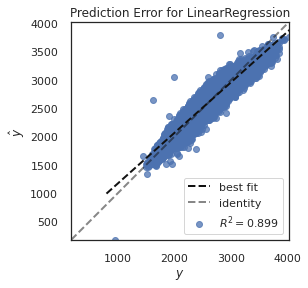

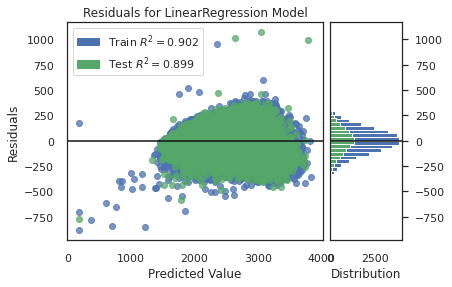

In [26]:
#Solução 14.4
#MODELO com as 4 variáveis com melhor correlação com a nota total: CH, LC e Componentes 2 e 3 da Redação
#Resultado muito melhor que o primeiro modelo
notas = ['NU_NOTA_CH',	'NU_NOTA_LC',	'NU_NOTA_COMP2','NU_NOTA_COMP3','nota_total']
regressao_completa_para(notas)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 4) (33201,) (11067, 4) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_COMP1' 'NU_NOTA_COMP2' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.8455935893841038
mse 24294.117836530102
mae 124.44870050698181


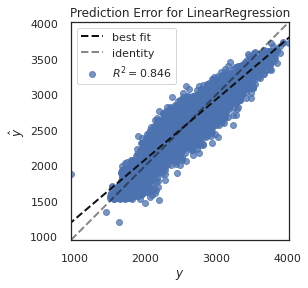

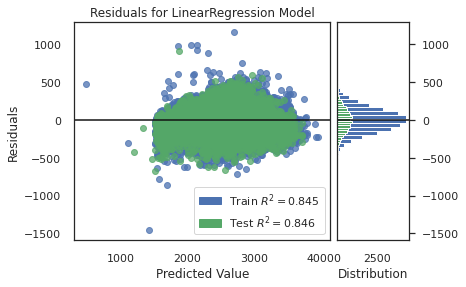

In [27]:
#Solução 14.5
#MODELO com as 4 variáveis com pior correlação com a nota total: CH, LC e Componentes 2 e 3 da Redação
#Resultado ainda é bom.
notas = ['NU_NOTA_CN', 'NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP5','nota_total']
regressao_completa_para(notas)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 5) (33201,) (11067, 5) (11067,)
Usando colunas ['NU_NOTA_COMP1' 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4'
 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.669947480117117
mse 51930.06416181119
mae 183.51132561008174


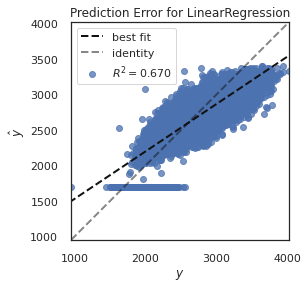

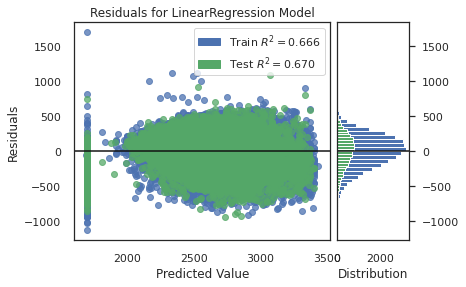

In [28]:
#Solução 14.6
#MODELO somente com variáveis da redação
#modelo tem desempenho pior usando somente essas
notas = ['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'nota_total']
regressao_completa_para(notas)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.8917247180109095
mse 17035.90187048674
mae 103.40020028927553


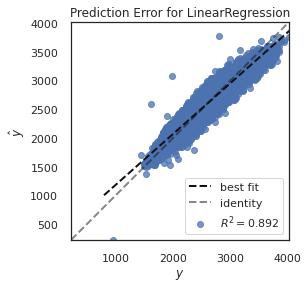

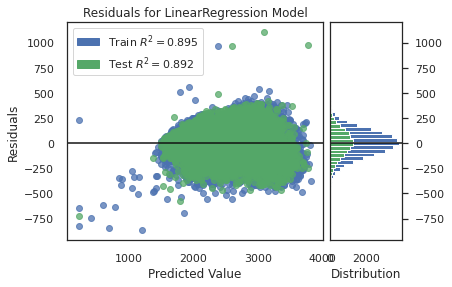

In [29]:
#Solução 14.7
#MODELO com as 3 melhores variáveis 
notas = ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP3', 'nota_total']
regressao_completa_para(notas)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_COMP2' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.8121853327279865
mse 29550.532519569162
mae 136.8443021195576


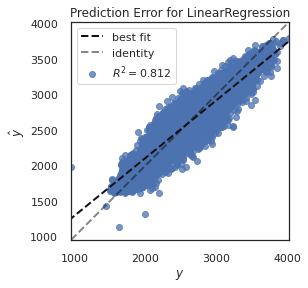

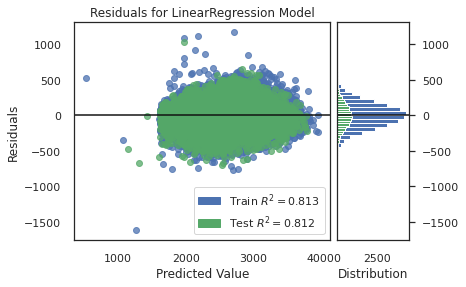

In [30]:
#Solução 14.8
#MODELO com as 3 variáveis com pior correlação com a nota total: CH, LC e Componentes 2 e 3 da Redação
#Resultado ainda é bom.
notas = ['NU_NOTA_CN','NU_NOTA_COMP2','NU_NOTA_COMP5','nota_total']
regressao_completa_para(notas)

Pergunta: tente um modelo específico

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.9250752608326929
mse 11788.567812316254
mae 86.18740233062171


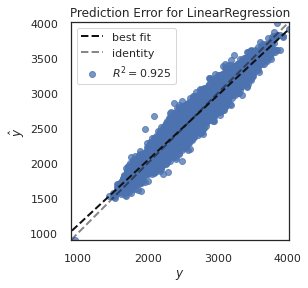

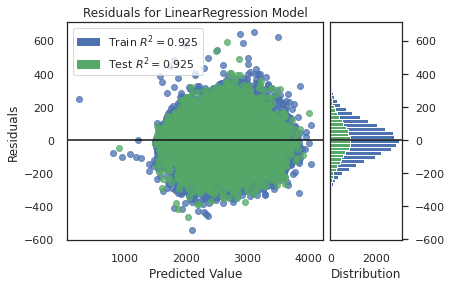

In [31]:
#Solução 15
#O modelo específico apresenta um bom resultado.
notas = ['NU_NOTA_LC', 'NU_NOTA_MT',	'NU_NOTA_COMP3','nota_total']
regressao_completa_para(notas)

Pergunta: Prepare diversos estimadores

In [0]:
#Solução 16
#Função gera regressores
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def gera_regressores():
    modelo1 = LinearRegression()
    modelo2 = Lasso()
    modelo3 = Ridge()
    modelo4 = DecisionTreeRegressor()
    modelo5 = RandomForestRegressor()
    modelos = [modelo1, modelo2, modelo3, modelo4, modelo5]
    return modelos

In [0]:
if(len(gera_regressores()) != 5):
    print("Erro!!! São 5 regressores que queremos testar!")

Pergunta: crie uma função que escolhe parte dos dados

In [0]:
# Solução 17
def escolhe_dados(dados, colunas):
    SEED = 42367
    np.random.seed(SEED)
    x = dados[colunas].drop('nota_total', axis=1)
    y = dados['nota_total']
    train_x, test_x, train_y, test_y = train_test_split(x, y, shuffle=True)

    plt.figure(figsize = (15,8))
    plt.xlabel('Nota total')
    plt.ylabel('Número de candidatos')
    plt.title('Histograma de notas da amostra')
    sns.distplot(enem_eda['nota_total'], kde=False)
    
    return train_x, test_x, train_y, test_y

,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP3
5404406,392.300,366.600,80.000
4178076,650.000,751.300,200.000
5068794,624.400,791.400,140.000
4624170,488.600,492.000,100.000
2604135,435.700,436.400,140.000


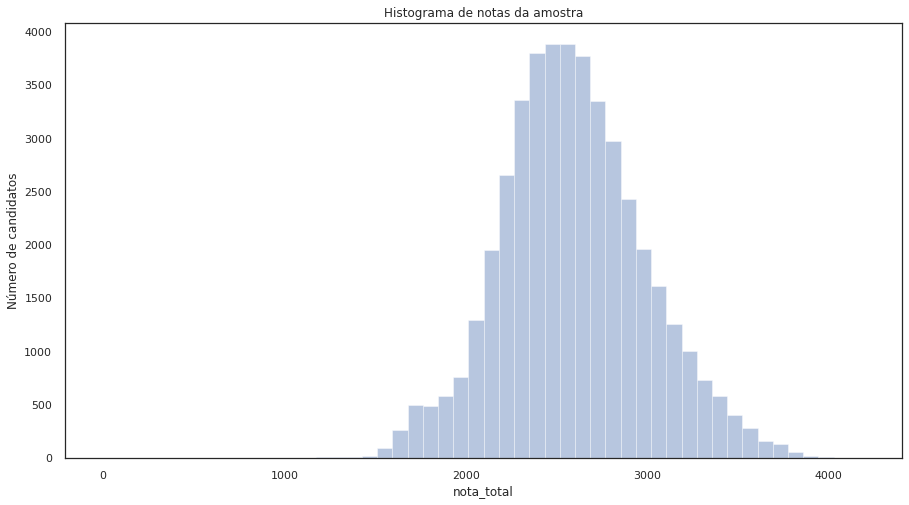

In [35]:
notas = ['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3', 'nota_total']
train_x, test_x, train_y, test_y = escolhe_dados(enem_eda, notas)
train_x.head()

Pergunta: treine e gere as métricas

In [0]:
#Solução 18:
import time
def treina_e_mede_regressor(modelo, train_x, test_x, train_y, test_y):
    tic = time.time()
    modelo.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic

    test_pred = modelo.predict(test_x)
    mse = mean_squared_error(test_y, test_pred)
    mae = mean_absolute_error(test_y, test_pred)
    print("Resultado:", modelo, mse, mae)

    return mse, mae, tempo_de_treino

In [0]:
#Solução 19: análise das regressões:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
import matplotlib.pyplot as plt

def analisa_regressao(dados):
    train_x, test_x, train_y, test_y = escolhe_dados(dados, ["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3", "nota_total"])
    
    resultados = []
    for modelo in gera_regressores():
        scaler = StandardScaler()    
        pipe = Pipeline([('transformação', scaler), ('modelo', modelo)])
        
        mse, mae, tempo_de_treino = treina_e_mede_regressor(pipe, train_x, test_x, train_y, test_y)
        
        resultados.append([modelo, pipe, tempo_de_treino, mse, mae])
        
    resultados = pd.DataFrame(resultados, columns=["modelo", "pipe", "tempo_de_treino", "mse", "mae"])
    return test_x, test_y, resultados

Resultado: Pipeline(memory=None,
         steps=[('transformação',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('modelo',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False) 11788.567812316254 86.18740233062171
Resultado: Pipeline(memory=None,
         steps=[('transformação',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('modelo',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False) 11786.673810163153 86.22345492148199
Resultado: Pipeline(memory=None,
         steps=[('transformação',
                 StandardScaler(copy=True, with_mean=True, with

,modelo,mse,mae,tempo_de_treino
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",11788.568,86.187,0.005
1,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",11786.674,86.223,0.014
2,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",11788.548,86.188,0.006
3,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",22956.523,119.489,0.164
4,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",13126.248,90.369,7.913


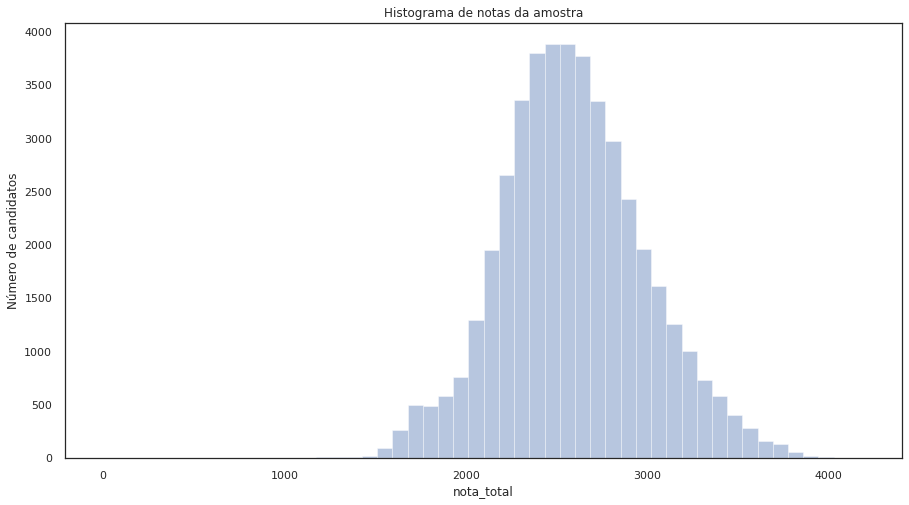

In [38]:
#Solução 19:
test_x, test_y, notas = analisa_regressao(enem_eda)
notas[["modelo", "mse", "mae", "tempo_de_treino"]]

Pergunta: As notas de treino

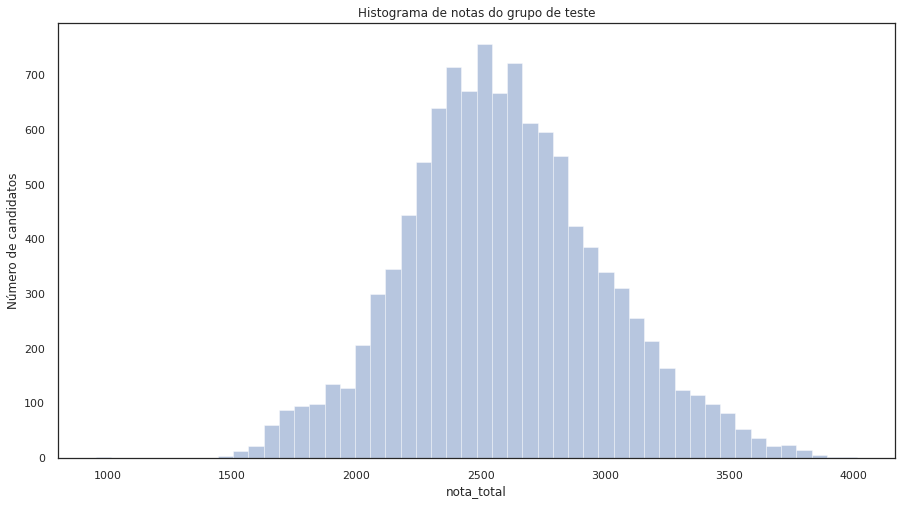

In [39]:
#Solução 20: plotando test_y

plt.figure(figsize = (15,8))
plt.xlabel('Nota total')
plt.ylabel('Número de candidatos')
plt.title('Histograma de notas do grupo de teste')
sns.distplot(test_y, kde=False)

Pergunta: criando as classes

In [0]:
# Solução 21: define o top 25 candidatos do ENEM.
def top_p(serie, p=0.75):
  quant = serie.quantile(q = p)
  print("quantile encontrado", quant)
  y = serie > quant
  troca = {True : 1, False: 0}
  y = y.map(troca)
  return y

In [41]:
# teste do top 25%
top_25 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.75).values
if(not np.array_equal(top_25, [0,0,0,0,0,0,0,1,1,1])):
    print("Não retornou o top 25% corretamente, deveria ser ", top_25)

quantile encontrado 7.75


In [42]:
# teste do top 10%
top_10 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.90).values
if(not np.array_equal(top_10, [0,0,0,0,0,0,0,0,0,1])):
    print("Não retornou o top 10% corretamente, deveria ser", top_10)

quantile encontrado 9.1


Visualizando classes e features

quantile encontrado 2837.8500000000004


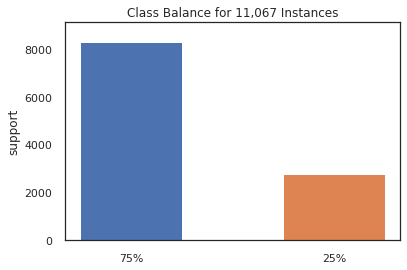

In [43]:
# Visualizando classes e features
y_top25 = top_p(test_y)
y_top25.mean()

from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["75%", "25%"])
visualizer.fit(y_top25)
visualizer.poof()

Para saber mais: agrupando

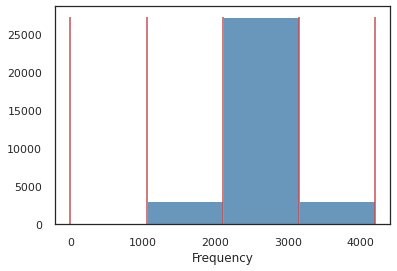

In [44]:
# Criando binnings por meio do yellowbrick
from yellowbrick.target import BalancedBinningReference

visualizer = BalancedBinningReference()
visualizer.fit(train_y)
visualizer.poof()

Pergunta: Prepare diversos estimadores

In [0]:
#Solução 22: criando estimadores de classificação.
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def gera_classificadores():
    modelo1 = DummyClassifier(strategy='most_frequent')
    modelo2 = LogisticRegression()
    modelo3 = RidgeClassifier()
    modelo4 = DecisionTreeClassifier()
    modelo5 = RandomForestClassifier(n_estimators=10)
    modelo6 = SVC()
    modelos = [modelo1, modelo2, modelo3, modelo4, modelo5, modelo6]
    return modelos

In [0]:
if(len(gera_classificadores()) != 6):
    print("Erro!!! São 6 classificadores que queremos testar!")

Pergunta: defina uma nova função de split, agora baseada nas classes

In [0]:
#Solução 23: nova função de split
def split_classificacao(dados):
  SEED = 42367
  np.random.seed(SEED)
  x = dados.drop('top_p', axis=1)
  y = dados['top_p']
  train_x, test_x, train_y, test_y = train_test_split(x, y, shuffle=True, stratify = y)

  print("*" * 80)
  print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
  print("Usando colunas %s como X" % str(train_x.columns.values))
  print("Média do conjunto de testes", test_y.mean())
  return train_x, test_x, train_y, test_y

In [48]:
interesse = enem_eda[["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
interesse['top_p'] = top_p(interesse['nota_total'])
interesse = interesse[["top_p", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]

train_x, test_x, train_y, test_y = split_classificacao(interesse)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Pergunta: implemente o treino e o teste do classificado

In [0]:
#Solução 24: implementando o treino e o teste do classificador
import time
def treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y):
    tic = time.time()
    pipe.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic
    accuracy_score = pipe.score(test_x, test_y)
    print("Resultado", nome, accuracy_score)

    return accuracy_score, tempo_de_treino

Pergunta implemente a função de escolha de dados e split para classificação

In [0]:
#Solução 25: escolhendo dados de classificação
def escolhe_dados_para_classificacao(dados, colunas, p):
    SEED = 42367
    np.random.seed(SEED)    
    interesse = dados[colunas].drop('nota_total', axis=1)
    nota_total = dados['nota_total']
    interesse['top_p'] = top_p(nota_total, p)
    
    train_x, test_x, train_y, test_y = split_classificacao(interesse)
    train_y.hist()
    plt.show()
    return train_x, test_x, train_y, test_y

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


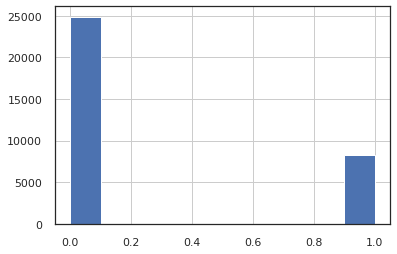

In [51]:
# testando a escolha
train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(enem_eda, ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"], p=0.75)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)

In [0]:
# código pronto
def analisa_classificacao(dados, p = 0.75):
    
    colunas = ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]
    train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados, colunas, p=p)
    
    resultados = []
    for modelo in gera_classificadores():
        nome = type(modelo).__name__
        pipe = make_pipeline(StandardScaler(), modelo)
        accuracy_score, tempo_de_treino = treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y)
        resultados.append([nome, modelo, pipe, tempo_de_treino, accuracy_score])
        
    resultados = pd.DataFrame(resultados, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
    return test_x, test_y, resultados.set_index("tipo")

Pergunta: rode a analisa_classificacao

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


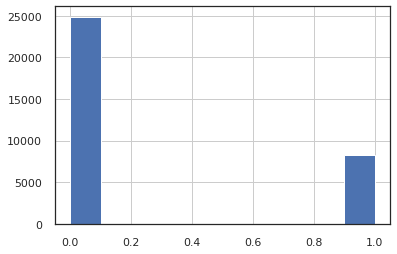

Resultado DummyClassifier 0.7499774103189663
Resultado LogisticRegression 0.9371103280021686
Resultado RidgeClassifier 0.9204843227613626
Resultado DecisionTreeClassifier 0.9070208728652751
Resultado RandomForestClassifier 0.9260865636577211
Resultado SVC 0.9374717628987078


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.007
LogisticRegression,0.937,0.068
RidgeClassifier,0.920,0.018
DecisionTreeClassifier,0.907,0.109
RandomForestClassifier,0.926,0.265
SVC,0.937,7.600


In [53]:
#Solução 26.1:
# top 25%
test_x, test_y, notas = analisa_classificacao(enem_eda, 0.75)
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2915.7
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.19996385651034607


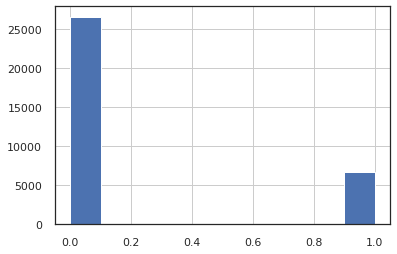

Resultado DummyClassifier 0.8000361434896539
Resultado LogisticRegression 0.9456944067949761
Resultado RidgeClassifier 0.9262672811059908
Resultado DecisionTreeClassifier 0.9213879100027108
Resultado RandomForestClassifier 0.9348513598987982
Resultado SVC 0.9461462004156501


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.800,0.007
LogisticRegression,0.946,0.066
RidgeClassifier,0.926,0.017
DecisionTreeClassifier,0.921,0.106
RandomForestClassifier,0.935,0.266
SVC,0.946,5.863


In [54]:
#Solução 26.2:
# top 20%
test_x, test_y, notas = analisa_classificacao(enem_eda, 0.8)
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3119.0
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.09993674889310562


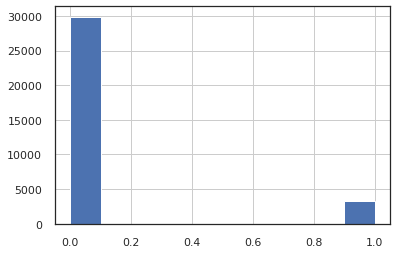

Resultado DummyClassifier 0.9000632511068943
Resultado LogisticRegression 0.9707237733803199
Resultado RidgeClassifier 0.9267190747266648
Resultado DecisionTreeClassifier 0.9570796060359628
Resultado RandomForestClassifier 0.9643083039667479
Resultado SVC 0.9700912623113762


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.900,0.007
LogisticRegression,0.971,0.085
RidgeClassifier,0.927,0.016
DecisionTreeClassifier,0.957,0.086
RandomForestClassifier,0.964,0.212
SVC,0.970,3.752


In [55]:
#Solução 26.3:
# top 10%
test_x, test_y, notas = analisa_classificacao(enem_eda, 0.9)
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3290.7950000000005
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.04996837444655281


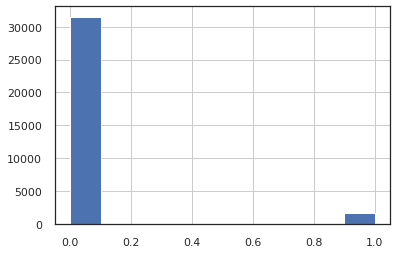

Resultado DummyClassifier 0.9500316255534472
Resultado LogisticRegression 0.9793078521731273
Resultado RidgeClassifier 0.9500316255534472
Resultado DecisionTreeClassifier 0.9723502304147466
Resultado RandomForestClassifier 0.9769585253456221
Resultado SVC 0.9793982108972621


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.950,0.008
LogisticRegression,0.979,0.076
RidgeClassifier,0.950,0.017
DecisionTreeClassifier,0.972,0.091
RandomForestClassifier,0.977,0.192
SVC,0.979,1.877


In [56]:
#Solução 26.4:
# top 5%
test_x, test_y, notas = analisa_classificacao(enem_eda, 0.95)
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3588.7
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.01002981837896449


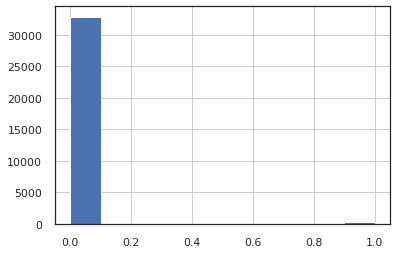

Resultado DummyClassifier 0.9899701816210356
Resultado LogisticRegression 0.9946688352760459
Resultado RidgeClassifier 0.9899701816210356
Resultado DecisionTreeClassifier 0.9924098671726755
Resultado RandomForestClassifier 0.994126682931237
Resultado SVC 0.9947591940001808


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.990,0.007
LogisticRegression,0.995,0.095
RidgeClassifier,0.990,0.015
DecisionTreeClassifier,0.992,0.089
RandomForestClassifier,0.994,0.184
SVC,0.995,0.574


In [57]:
#Solução 26.5:
# top 1%
test_x, test_y, notas = analisa_classificacao(enem_eda, 0.99)
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2330.475
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.7499774103189663


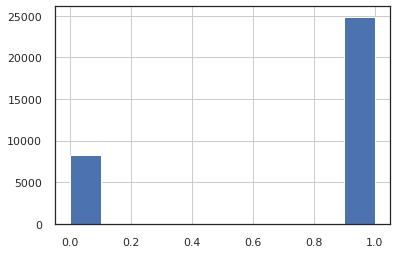

Resultado DummyClassifier 0.7499774103189663
Resultado LogisticRegression 0.9208457576579019
Resultado RidgeClassifier 0.9033161651757478
Resultado DecisionTreeClassifier 0.8882262582452336
Resultado RandomForestClassifier 0.9027740128309388
Resultado SVC 0.9225625734164633


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.007
LogisticRegression,0.921,0.061
RidgeClassifier,0.903,0.017
DecisionTreeClassifier,0.888,0.118
RandomForestClassifier,0.903,0.274
SVC,0.923,9.281


In [58]:
#Solução 26.6:
# top 75%
test_x, test_y, notas = analisa_classificacao(enem_eda, 0.25)
notas[["accuracy_score", "tempo_de_treino"]]

Escolhendo o top 25%

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


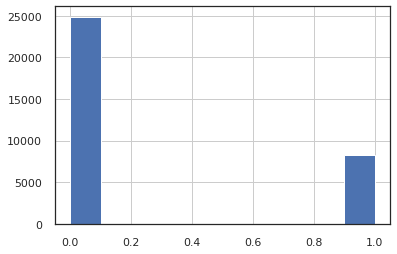

Resultado DummyClassifier 0.7499774103189663
Resultado LogisticRegression 0.9371103280021686
Resultado RidgeClassifier 0.9204843227613626
Resultado DecisionTreeClassifier 0.9070208728652751
Resultado RandomForestClassifier 0.9260865636577211
Resultado SVC 0.9374717628987078


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.007
LogisticRegression,0.937,0.064
RidgeClassifier,0.920,0.016
DecisionTreeClassifier,0.907,0.106
RandomForestClassifier,0.926,0.257
SVC,0.937,7.382


In [59]:
# top 25%
test_x, test_y, notas = analisa_classificacao(enem_eda, 0.75)
notas[["accuracy_score", "tempo_de_treino"]]

Plotando a matriz de confusão

In [0]:
#Solução 27
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    
    classes = ['Não topo 25%','Topo 25%']

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de confusão normalizada')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.tight_layout()
    plt.show()

def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)

Acurácia do modelo em teste 0.9371103280021686


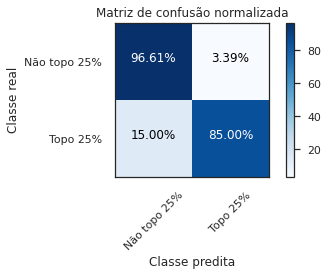

In [61]:
# código pronto
print_confusion_for(test_x, test_y, notas.loc['LogisticRegression']['pipe'])

Acurácia do modelo em teste 0.9374717628987078


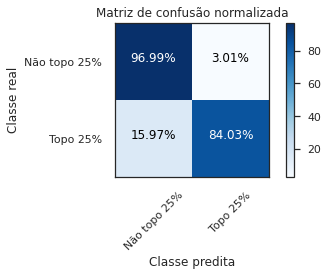

In [62]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['SVC']['pipe'])

Vamos validar?

In [63]:
#Solução 28
usados_no_eda = enem_eda.index
a_usar = enem.index.isin(usados_no_eda)
enem_validacao = enem[a_usar]
print("Para otimização temos %d elementos" % len(enem_validacao))
del(a_usar)
del(usados_no_eda)

Para otimização temos 44268 elementos


Pergunta: separe os dados adequadamente de validação

In [0]:
#Solução 29
def separa_dados_de_classificacao_para_validacao(dados):
    x = dados[['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3']]
    y = top_p(dados['nota_total'], 0.75)
    print("Média da validação", y.mean())
    return x, y

Pergunta: defina uma função de validação cruzada de um modelo de classificação

In [0]:
#Solução 30
from sklearn.model_selection import cross_val_score, StratifiedKFold

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    
    x, y = separa_dados_de_classificacao_para_validacao(dados)
    
    scores = cross_val_score(modelo, x, y, cv = StratifiedKFold(n_splits=10, shuffle = True))
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.2f,%.2f]" % (100*mean - 2*std, 100*mean + 2*std))
    
    modelo.fit(x, y)
    print_confusion_for(x, y, modelo)

quantile encontrado 2841.625
Média da validação 0.25
Acurácia entre [93.54,93.55]
Acurácia do modelo em teste 0.9356194090539441


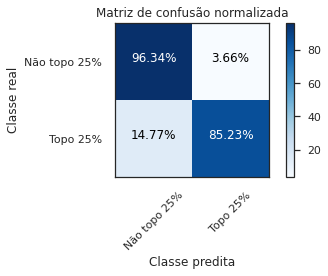

In [66]:
pipeline_logistica = make_pipeline(StandardScaler(), LogisticRegression())
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_logistica)

Pergunta: Implementando nosso estimador

In [0]:
#Solução 31
from sklearn.metrics import accuracy_score

class HeuristicaTop25:

    def fit(self, X, y = None):
        if(X.shape[1] != 3):
            print("Erro!!! Estávamos esperando 3 colunas!")
            
        parcial = X.sum(axis=1)
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        parcial = X.sum(axis=1)
        y_pred_true_false = parcial >= self.top_25_quantile
        y_pred = y_pred_true_false.replace([True, False], [1, 0])
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

quantile encontrado 2841.625
Média da validação 0.25
top 25 quantile é 1250.30
top 25 quantile é 1250.40
top 25 quantile é 1250.20
top 25 quantile é 1250.60
top 25 quantile é 1250.30
top 25 quantile é 1250.30
top 25 quantile é 1250.60
top 25 quantile é 1250.20
top 25 quantile é 1251.10
top 25 quantile é 1250.60
Acurácia entre [91.96,91.98]
top 25 quantile é 1250.50
Acurácia do modelo em teste 0.9197388632872504


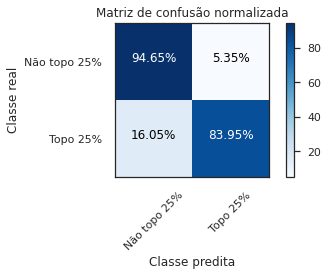

In [68]:
treina_e_valida_modelo_de_classificacao(enem_validacao, HeuristicaTop25())

Acurácia do modelo em teste 0.7499774103189663


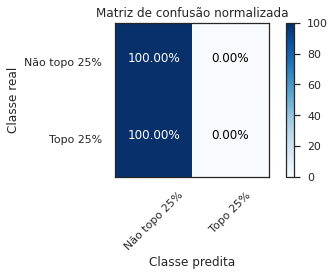

In [69]:
print_confusion_for(test_x, test_y, notas.loc['DummyClassifier']['pipe'])

Pergunta: Compare os resultados da acurácia e da matriz de confusão entre (a) heurística final com (b) o DummyClassifier e (c) a LogisticRegression

---

Resposta: O algoritmo LogisticRegression teve um desempenho levemente superior ao heurísticatop25 (diferença de 0.0159 no score). A diferença também foi pequena para os resultados da matriz de confusão. Ex: a Heurísticatop25 acertou 83.95% dos alunos do top 25 corretamente enquanto ou LogistiRegression acertou 85.23%. Já o dummyclassifier teve um desempenho ruim de aproximadamente 0.75. Nesse caso ele errou todas as vezes que tentou classificar um aluno do top 25 e acertou todos do não 25. Ou seja, ele chutou que todos os alunos pertecem ao grupo do não top 25.

A recomendação para este caso é utilizar o LogisticRegression, pois além de um resultado um pouco superior ao baseline ele também tem um tempo de execução pequeno.

Pergunta: Sugira uma outra heurística que poderia ser usada para tentar detectar facilmente o top 25%, sem a necessidade de um modelo complexo.

---

Outra opção de heurística seria definir aleatoriamente quem são os top 25. Usando um função randomica para cada candidato com x % de chance de classificar como top 25 e (1-x)% de não ser do top 25. O chute inicial poderia ser x = 25%.

Pergunta: Se uma faculdade oferecer bolsa somente para quem o modelo julgar estar no top 25% o que acontece quando ele julga errôneamente que alguém não está no top 25%? E se julgar errôneamente que está no top 25%?

---

RESPOSTA:
No caso 1, a pessoa ficará 'injustamente' sem ganhar a bolsa, mesmo tendo capacidade para isso. No caso 2, a faculdade dará a bolsa para uma pessoa que não estaria no top 25 e o seu intevestimento no aluno poderia ser mal alocado.